# Import dependencies

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# Import the data

In [93]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=0, cluster_std=1.5)

In [94]:
X.shape, y.shape

((1000, 2), (1000,))

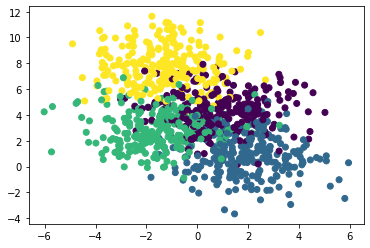

In [95]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# Define the K-means class

In [96]:
class Kmeans:
    """K-means clustering algorithm."""
    def __init__(self, n_clusters=4, max_iter=300, tolerance=1e-10):
        """
        Initialize the K-means clustering algorithm.

        Parameters
        ----------
            n_clusters : int
                Number of clusters.
            max_iter : int
                Maximum number of iterations.
            tolerance : float
                Tolerance for the stopping criteria.
            centroids : np.ndarray
                Centroids of the clusters.
            data_clusters : list
                List of data points in each cluster.
            data_errors : list
                List of errors of data points in each cluster.
            centroids_errors : list
                List of errors of centroids in each cluster.
            """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.centroids = None
        self.data_clusters = [[] for _ in range(self.n_clusters)]
        self.data_errors = [[] for _ in range(self.n_clusters)]
        self.centroids_errors = [[] for _ in range(self.n_clusters)]

    def create_clusters(self, centroids, X):
        """Create clusters."""
        data_clusters = [[] for _ in range(self.n_clusters)]
        for i, x in enumerate(X):
            distances = [np.linalg.norm(x - c) for c in centroids]
            cluster = np.argmin(distances)
            data_clusters[cluster].append(i)
        return data_clusters

    def get_centroids(self, data_clusters, X):
        """return centroids of clusters."""
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i, cluster in enumerate(data_clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def get_centroid_error(self, centroid, centroid_old):
        """
        Return the error between the old and new centroids.
        """
        return np.linalg.norm(centroid - centroid_old)

    def get_centroids_error(self, centroids, centroids_old):
        """
        Return the error between the old and new centroids.
        """
        return np.sum(np.linalg.norm(centroids - centroids_old))

    def get_data_error(self, centroid, data_clusters):
        """
        Return the error between the data points and its centroid.
        """
        return np.linalg.norm(data_clusters - centroid)

    def fit(self, X):
        """Fit the K-means clustering algorithm."""
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            self.data_clusters = self.create_clusters(self.centroids, X)
            centroids_old = self.centroids
            self.centroids = self.get_centroids(self.data_clusters, X)
            for i in range(self.n_clusters):
                self.centroids_errors[i].append(self.get_centroids_error(self.centroids[i], centroids_old[i]))
                self.data_errors[i].append(self.get_data_error(self.centroids[i], X[self.data_clusters[i]]))

            # if self.get_centroids_error(self.centroids, centroids_old) < self.tolerance:
            #     break


In [97]:
model = Kmeans(n_clusters=4)
model.fit(X)

# Plotting the result

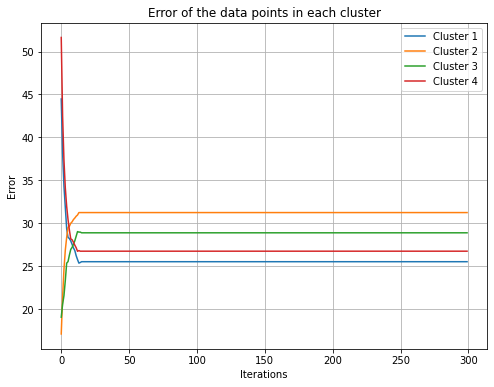

In [98]:
plt.figure(figsize=(8, 6))
plt.title('Error of the data points in each cluster')
plt.xlabel('Iterations')
plt.ylabel('Error')
for i in range(model.n_clusters):
    plt.plot(model.data_errors[i], label='Cluster {}'.format(i+1))
plt.legend()
plt.grid()
plt.show()

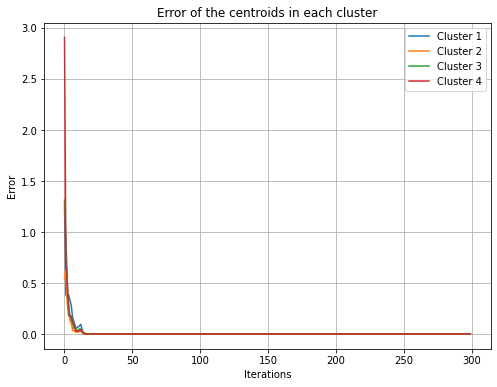

In [99]:
plt.figure(figsize=(8, 6))
plt.title('Error of the centroids in each cluster')
plt.xlabel('Iterations')
plt.ylabel('Error')
for i in range(model.n_clusters):
    plt.plot(model.centroids_errors[i], label='Cluster {}'.format(i+1))
plt.legend()
plt.grid()
plt.show()